<a href="https://colab.research.google.com/github/mayankjain281/Project_4_Walmart_inferential_statistical_analysis/blob/main/Project_4_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries and dataset

Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).



What good looks like?

*  Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
*  Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
* Do some data exploration steps like:
*  Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
*  Inference after computing the average female and male expenses.
*  Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
*  Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
*  The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
*  Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
*  Perform the same activity for Married vs Unmarried and Age
*  For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
*  Give recommendations and action items to Walmart.

#Analysing basic metrics

* Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
df = pd.read_csv('/content/walmart_data.txt')

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
type(df)
#type of dataset is Pandas DataFrame

pandas.core.frame.DataFrame

In [ ]:
df.shape
#(rows, columns)

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
columns=['Occupation', 'Marital_Status', 'Product_Category']
df[columns]=df[columns].astype('object')

# Now we are converting categoric columns from int datatype to object datatype.
# That will be heplful, when we will analyse description for categoric columns.

#Non Graphical Analysis

In [ ]:
df.nunique()

# no column has count of unique values same as len of all rows,
# so we have the only default index values as unique identifier.
# Column 'Purchase' is continous and we kept it as int datatype,
# Columns like 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category' are categorical.

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
# Checking name and count of unique attributes in categoric variables ​

for col in df.columns:
  print('{} :{} = {} ' . format(col,df[col].unique(),df[col].nunique()))
print()

# There are 20 product categories in total.
# There are 21 different types of occupations in the city.

User_ID :[1000001 1000002 1000003 ... 1004113 1005391 1001529] = 5891 
Product_ID :['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853'] = 3631 
Gender :['F' 'M'] = 2 
Age :['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25'] = 7 
Occupation :[10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6] = 21 
City_Category :['A' 'C' 'B'] = 3 
Stay_In_Current_City_Years :['2' '4+' '3' '1' '0'] = 5 
Marital_Status :[0 1] = 2 
Product_Category :[3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19] = 20 
Purchase :[ 8370 15200  1422 ...   135   123   613] = 18105 



In [ ]:
#Checking how the data is spread on basis of distinct users (customer analysis)

df2=df.groupby(['User_ID']).first()
df2
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
cat_count = df2[categ_cols].melt().groupby(['variable', 'value'])[['value']].size().reset_index(name='counts')
s = df2[categ_cols].melt().variable.value_counts()
cat_count['Percent'] = cat_count['counts'].div(cat_count['variable'].map(s)).mul(100).round().astype('int')
cat_count.groupby(['variable', 'value']).first()

# 35% customers aged between the age 26-35
# 73% customers aged between the age 18-45
# 72% customers are Male and 28% are Female
# 58% customers are Single, 40% are Married
# 35% customers staying in city from 1 year

counts  Percent
variable                   value                 
Age                        0-17      218        4
                           18-25    1069       18
                           26-35    2053       35
                           36-45    1167       20
                           46-50     531        9
                           51-55     481        8
                           55+       372        6
City_Category              A        1045       18
                           B        1707       29
                           C        3139       53
Gender                     F        1666       28
                           M        4225       72
Marital_Status             0        3417       58
                           1        2474       42
Stay_In_Current_City_Years 0         772       13
                           1        2086       35
                           2        1145       19
                           3         979       17
                           4+        909       15

In [ ]:
#Checking how the data is spread on basis of distinct transection

df2=df.copy()
df2
categ_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
cat_count = df2[categ_cols].melt().groupby(['variable', 'value'])[['value']].size().reset_index(name='counts')
s = df2[categ_cols].melt().variable.value_counts()
cat_count['Percent'] = cat_count['counts'].div(cat_count['variable'].map(s)).mul(100).round().astype('int')
cat_count.groupby(['variable', 'value']).first()

# There are 35% customers are in age group 26-35 but they have purchased 40% products
# There are 72% customers are male but they have purchased 75% products

counts  Percent
variable                   value                 
Age                        0-17    15102        3
                           18-25   99660       18
                           26-35  219587       40
                           36-45  110013       20
                           46-50   45701        8
                           51-55   38501        7
                           55+     21504        4
City_Category              A      147720       27
                           B      231173       42
                           C      171175       31
Gender                     F      135809       25
                           M      414259       75
Marital_Status             0      324731       59
                           1      225337       41
Stay_In_Current_City_Years 0       74398       14
                           1      193821       35
                           2      101838       19
                           3       95285       17
                           4+      84726       15

In [ ]:
# Checking how product category contributes to the entire data (product analysis)

categ_cols = ['Product_Category']
cat_count = df[categ_cols].melt().groupby(['variable', 'value'])[['value']].size().reset_index(name='counts')
s = df[categ_cols].melt().variable.value_counts()
cat_count['Percent'] = cat_count['counts'].div(cat_count['variable'].map(s)).mul(100).round().astype('int')
cat_count.groupby(['variable', 'value']).first().sort_values('Percent',ascending=False)

# 27% sold porducts belong to category 5
# 26% sold porducts belong to category 1
# 21% sold porducts belong to category 8
# product category 9 and 17 are least sold.

counts  Percent
variable         value                 
Product_Category 5      150933       27
                 1      140378       26
                 8      113925       21
                 6       20466        4
                 2       23864        4
                 11      24287        4
                 3       20213        4
                 4       11753        2
                 16       9828        2
                 7        3721        1
                 10       5125        1
                 12       3947        1
                 13       5549        1
                 15       6290        1
                 18       3125        1
                 9         410        0
                 14       1523        0
                 17        578        0
                 19       1603        0
                 20       2550        0

In [ ]:
# Checking how product category contributes to the entire data (product analysis)
# Checking how categorical variables contributes to the entire data
categ_cols = ['Product_ID']
cat_count = df[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()
cat_count.rename(columns ={'value':'counts'}, inplace=True)
cat_count.sort_values('counts', ascending=False)
# 3631 types of products are present in data
# P00265242 is most purchased product

counts
variable   value            
Product_ID P00265242    1880
           P00025442    1615
           P00110742    1612
           P00112142    1562
           P00057642    1470
...                      ...
           P00068742       1
           P00012342       1
           P00162742       1
           P00091742       1
           P00231642       1

[3631 rows x 1 columns]

In [ ]:
# Users with highest number of purchases
df.groupby(['User_ID'])['Purchase'].count().nlargest(10)

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

In [ ]:
#Users with highest purchases amount
df.groupby(['User_ID'])['Purchase'].sum().nlargest(10)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

In [ ]:
describe_obj=df.describe(include='object')
describe_obj.rename(index={'top':'Mode'}, inplace=True)
describe_obj.loc['Mode %'] = describe_obj.apply(lambda x: int(round(x[3]/x[0]*100)))
describe_obj.T
# Customer with User_ID 1001680 is most loyal customer.
# Product with Product_ID P00265242 is most popular product.
# Products from Product_Category 5 are most purchased.
# 40% of the purchase done by aged 26-35.
# 59% Single contributes to the purchase count.
# 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
# There are 20 product categories in total.
# There are 20 different types of occupations in the city.

,count,unique,Mode,freq,Mode %
User_ID,550068,5891,1001680,1026,0
Product_ID,550068,3631,P00265242,1880,0
Gender,550068,2,M,414259,75
Age,550068,7,26-35,219587,40
Occupation,550068,21,4,72308,13
City_Category,550068,3,B,231173,42
Stay_In_Current_City_Years,550068,5,1,193821,35
Marital_Status,550068,2,0,324731,59
Product_Category,550068,20,5,150933,27


In [ ]:
df.describe().T
#descriptive statistics of continuous variables - mean, std, quartile, median, range
#

,count,mean,std,min,25%,50%,75%,max
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
df3=df.groupby(['City_Category'])['Purchase'].sum()
df3

City_Category
A    1316471661
B    2115533605
C    1663807476
Name: Purchase, dtype: int64

In [ ]:
df2=df.groupby(['User_ID'])['City_Category'].unique()
df2=pd.DataFrame(df2)
df2.reset_index().astype('str').City_Category.value_counts()/len(df2)

['C']    0.532847
['B']    0.289764
['A']    0.177389
Name: City_Category, dtype: float64

In [ ]:
#Checking the age group distribution in different city categories
data_crosstab = pd.crosstab(index=df["City_Category"],columns=df["Age"],margins=True,normalize="columns")
data_crosstab.round(2)

# We have seen earlier that city category B and A constitutes less percentage of total population
# but they contribute more towards purchase counts for customers aged 26-35 for B(40%) and A (50%)
# which can be the reason for these city categories to be more actively purchasing

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
City_Category,,,,,,,,
A,0.17,0.28,0.34,0.24,0.17,0.16,0.17,0.27
B,0.36,0.43,0.42,0.43,0.45,0.46,0.24,0.42
C,0.47,0.29,0.25,0.33,0.39,0.38,0.59,0.31


In [ ]:
data_crosstab = pd.crosstab(df['Marital_Status'],df['Gender'],margins = True, normalize="all")
data_crosstab.round(2)

#normalize over all values. Probability of single female customer is .17 over all customers.

# Mariginal probability: Probability of cutomers who are single is = 0.59
# Conditional probabitity: Probability of customers who are sigle and male is =0.45

Gender,F,M,All
Marital_Status,,,
0,0.14,0.45,0.59
1,0.10,0.31,0.41
All,0.25,0.75,1.00


In [ ]:
df.isna().sum()
#dataframe has no missing values in any column.
#no need for data cleaning or imputation.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df[df.duplicated()]

# No duplicate row present in dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


#Visual Analysis

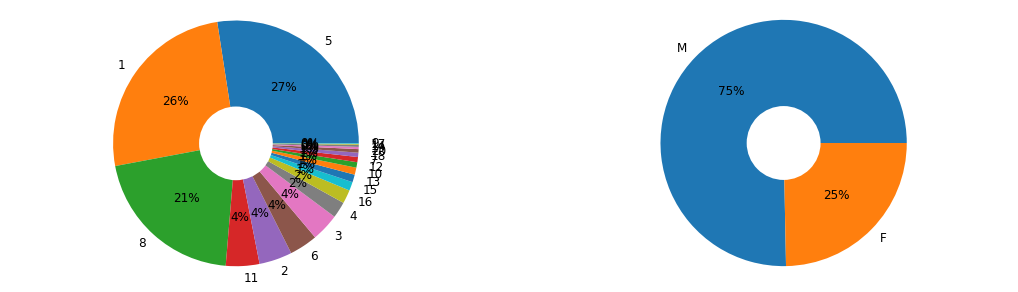

In [ ]:
fig=plt.figure(figsize = [18,5])

plt.subplot(1,2,1)
x_bar = df.Product_Category.value_counts().index
y_bar = df.Product_Category.value_counts()
plt.pie(y_bar, labels =x_bar, autopct="%0.0f%%", textprops={"fontsize":12})
centre_circle= plt.Circle((0,0),0.3,color='black', fc ='white',linewidth=0, )
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.subplot(1,2,2)
x_bar = df.Gender.value_counts().index
y_bar = df.Gender.value_counts()
plt.pie(y_bar, labels =x_bar, autopct="%0.0f%%", textprops={"fontsize":12})
centre_circle= plt.Circle((0,0),0.3,color='black', fc ='white',linewidth=0, )
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.show()

# In dataset there are 20 Product categories.
# Product category 5,1,8 are most-popular product catagories.
# 27% of all products purchased from category 5.
# 26% of all products purchased from category 1.
# 21% of all products purchased from category 8.
# other categories are liked by less then 4% customers for each categories.

# 75% products purchased by male
# 25% products purchased by female

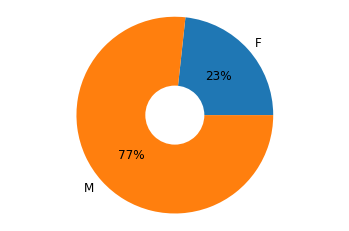

In [ ]:

plt.show()

# Customers from City_Catagory (B) purchased most amount of products.
# Customers from Age group (26-35) purchased most amount of products.

In [ ]:
top_cat_sale = df.groupby(['Product_Category'])['Purchase'].sum().head(3).sum()
total_sale = df['Purchase'].sum()
print("sale percentage :",round(top_cat_sale/total_sale,2)*100)

# nearly half of of total sales generated from only 3 product catagories out of 20 product categories.

sale percentage : 47.0


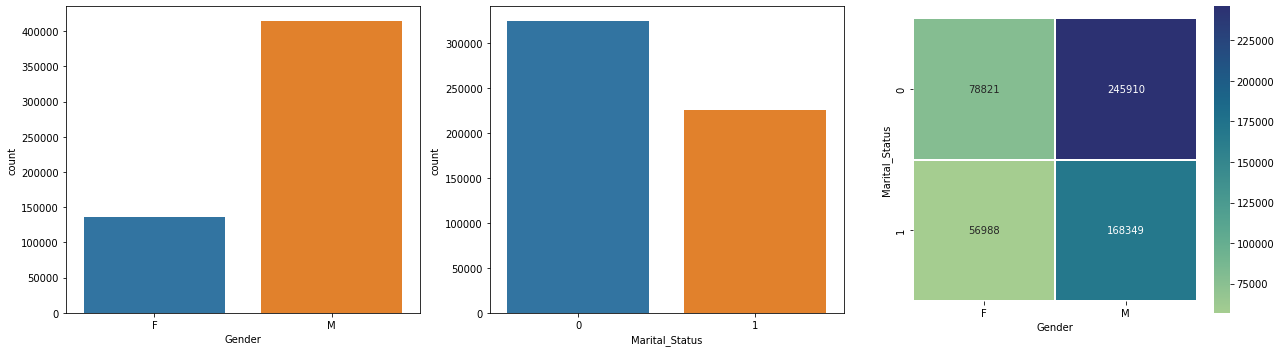

In [ ]:
plt.figure(figsize = [18,5])

plt.subplot(1, 3, 1)
sns.countplot(data=df, x="Gender")

plt.subplot(1, 3, 2)
sns.countplot(data=df, x="Marital_Status")

plt.subplot(1, 3, 3)
ct_counts = df.groupby(['Gender', 'Marital_Status']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Marital_Status', columns = 'Gender', values = 'count')
sns.heatmap(ct_counts, cmap= "crest", annot = True, fmt = 'd', square=1, linewidth=1.)
plt.tight_layout()
plt.show()

# Major quantity of products are purchased by Single Male.
# Least quantity of products purchased by Married Female.

In [ ]:
df.groupby(['Gender'])['Purchase'].count()
# Total products purchased by males is around 144 thousand whereas for females it's just 135 thousand.

Gender
F    135809
M    414259
Name: Purchase, dtype: int64

In [ ]:
df.groupby(['Gender'])['Purchase'].sum()
# Total amount spend by males is around 4 billion whereas for females it's 1.2 billion.

Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


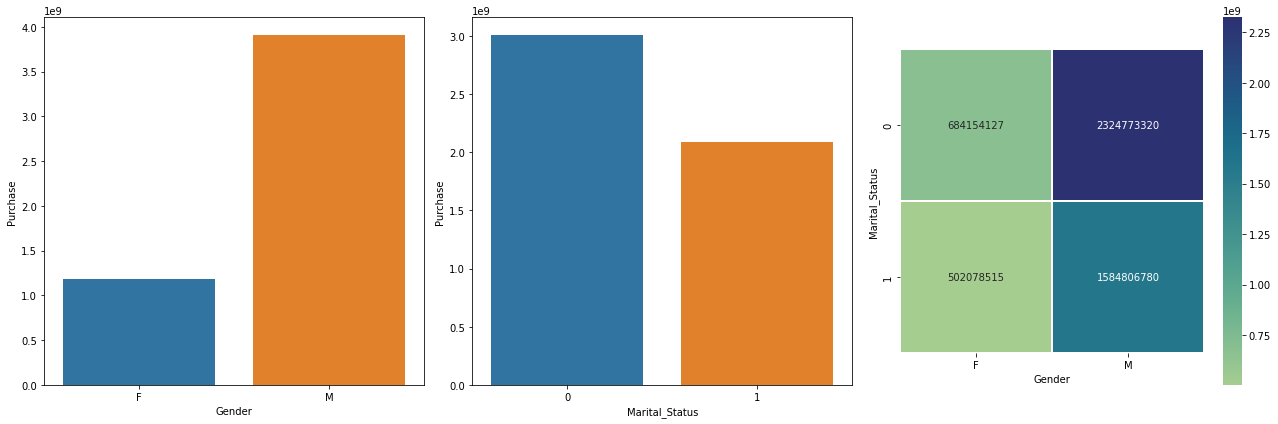

In [ ]:
df4= df.groupby(['Gender'])['Purchase'].sum().reset_index()
df5= df.groupby(['Marital_Status'])['Purchase'].sum().reset_index()
plt.figure(figsize=[18,6])
plt.subplot(1,3,1)
sns.barplot(df4['Gender'],df4['Purchase'])
plt.subplot(1,3,2)
sns.barplot(df5['Marital_Status'],df5['Purchase'])
plt.subplot(1, 3, 3)
ct_counts = df.groupby(['Gender', 'Marital_Status'])['Purchase'].sum()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Marital_Status', columns = 'Gender', values = 'count')
sns.heatmap(ct_counts, cmap= "crest", annot = True, fmt = 'd', square=1, linewidth=1.)
plt.tight_layout()
plt.show()
plt.show()

# Customers from City_Catagory (B) purchased most amount of products.
# Customers from Age group (26-35) purchased most amount of products.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


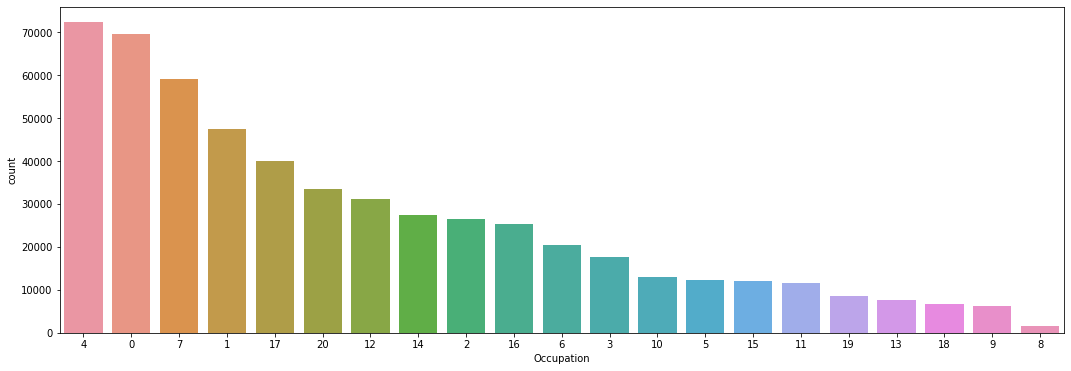

In [ ]:
plt.figure(figsize=[18,6])
sns.countplot(df['Occupation'], order = df['Occupation'].value_counts().index)
plt.show()

# In dataset there are 21 occupations categories.
# Occupation category 4, 0, and 7 are with higher number of purchases.
# Occupation category 8 has least number of purchaes.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


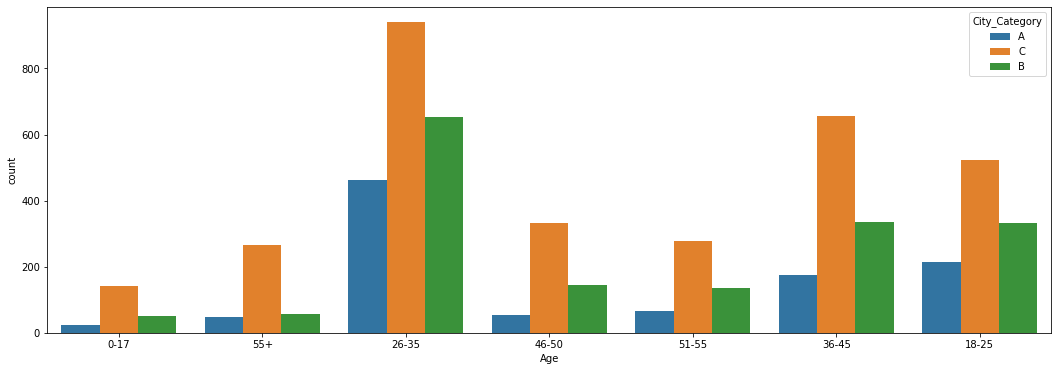

In [ ]:
df2=df.groupby(['User_ID']).first()
plt.figure(figsize=[18,6])
sns.countplot(df2['Age'], hue=df2['City_Category'])

# for every age category there are least count of costomer those belong to city category A, exept age category '26-35'
# In age category '26-35' the most count of customers belogs to city category C.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


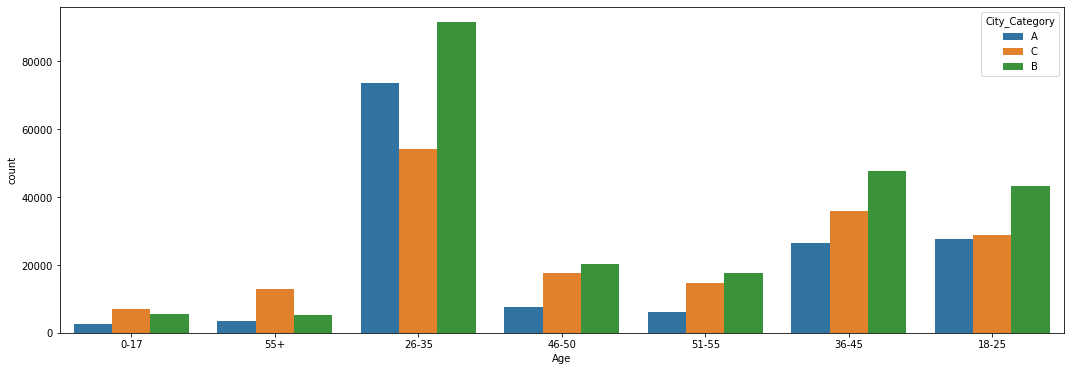

In [ ]:
plt.figure(figsize=[18,6])
sns.countplot(df['Age'], hue=df['City_Category'])
# In age category '26-35' the most count of customers belogs to city category C.
# But they have least count count of purchase than city category A and B.

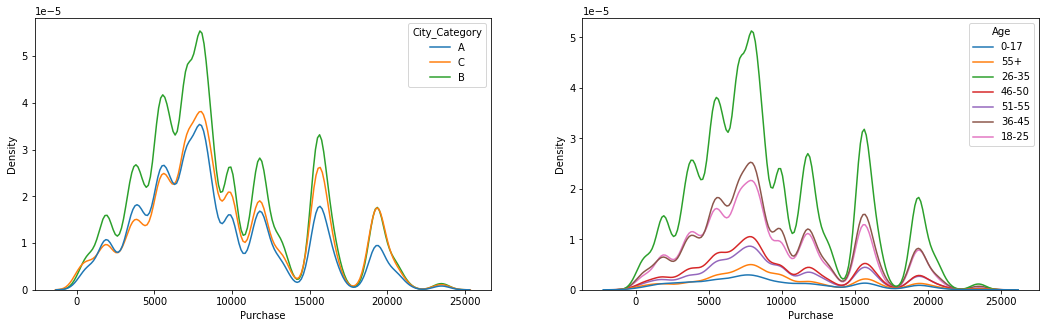

In [ ]:
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
sns.kdeplot(df['Purchase'],hue=df['City_Category'])
plt.subplot(1,2,2)
sns.kdeplot(df['Purchase'],hue=df['Age'])
plt.show()

# There is not significant difference in purchase trand
# City B and age goup 26-35 have higher density because of higher customer counts form those sections.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


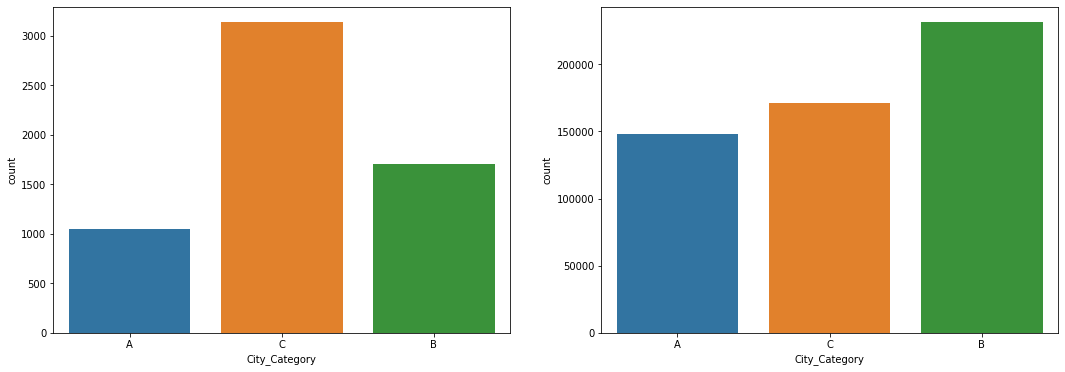

In [ ]:
df2=df.groupby(['User_ID']).first()
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.countplot(df2['City_Category'])
plt.subplot(1,2,2)
sns.countplot(df['City_Category'])
plt.show()

# Mostly customers lives in City_Catagory C.
# customers from City_Categroy (B) purchased most quantity of products.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


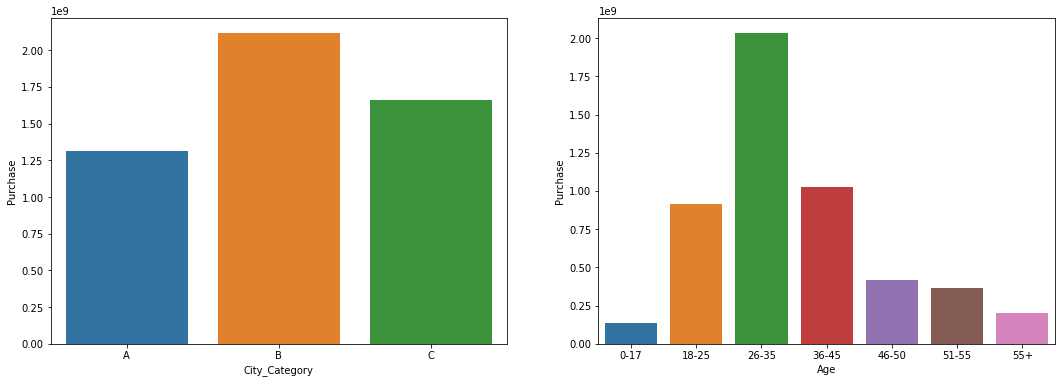

In [ ]:
df4= df.groupby(['City_Category'])['Purchase'].sum().reset_index()
df5= df.groupby(['Age'])['Purchase'].sum().reset_index()
plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.barplot(df4['City_Category'],df4['Purchase'])
plt.subplot(1,2,2)
sns.barplot(df5['Age'],df5['Purchase'])
plt.show()

# Customers from City_Catagory (B) purchased most amount of products.
# Customers from Age group (26-35) purchased most amount of products.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


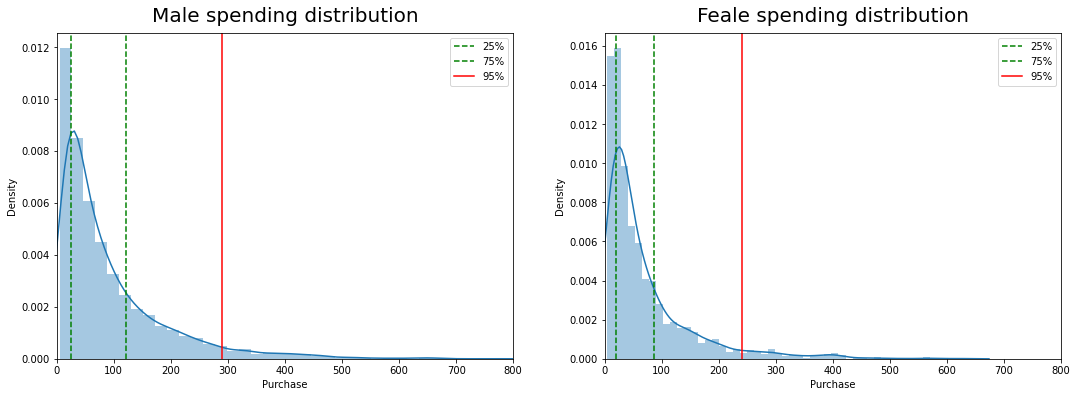

In [ ]:
df2 = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum().reset_index()

plt.figure(figsize=[18,6])
plt.subplot(1,2,1)
sns.distplot(df2[df2['Gender']=='M']['Purchase']/10000)
plt.axvline(np.percentile(df2[df2['Gender']=='M']['Purchase']/10000, 25), linestyle='--', color='green',label="25%")
plt.legend()
plt.axvline(np.percentile(df2[df2['Gender']=='M']['Purchase']/10000, 75), linestyle='--', color='green',label="75%")
plt.legend()
plt.axvline(np.percentile(df2[df2['Gender']=='M']['Purchase']/10000, 95), linestyle='-', color='red',label="95%")
plt.legend()
plt.title("Male spending distribution", y=1.015, fontsize=20)
plt.xlim(0,800)
plt.subplot(1,2,2)
sns.distplot(df2[df2['Gender']=='F']['Purchase']/10000)
plt.axvline(np.percentile(df2[df2['Gender']=='F']['Purchase']/10000, 25), linestyle='--', color='green',label="25%")
plt.legend()
plt.axvline(np.percentile(df2[df2['Gender']=='F']['Purchase']/10000, 75), linestyle='--', color='green',label="75%")
plt.legend()
plt.axvline(np.percentile(df2[df2['Gender']=='F']['Purchase']/10000, 95), linestyle='-', color='red',label="95%")
plt.legend()
plt.title("Female spending distribution", y=1.015, fontsize=20)
plt.xlim(0,800)
plt.show()

# distributions for Male spending and Female spending are highly right skewed (positive distribution).
# so in order to measure of variability or spread of the distribution,
# we are using first and third quartiles range, instead of standard deviation.
# There is more variance in Male spending distribution than female spending distribution.
# data points in Female spending distribution tend to be very close to the median.
# 5% of male customers purcahsed more than 2.8 million usd amount of products.
# 5% of female customers purcahsed more than 2.4 million usd amount of products.

In [ ]:
df2[df2['Gender']=='M']['Purchase'].skew(axis = 0),df2[df2['Gender']=='F']['Purchase'].skew(axis = 0)

(2.37378034880871, 2.4802021716417357)

In [ ]:
(np.percentile(df2[df2['Gender']=='M']['Purchase'], 95),(np.percentile(df2[df2['Gender']=='F']['Purchase'], 95)))

(2898857.4, 2409077.75)

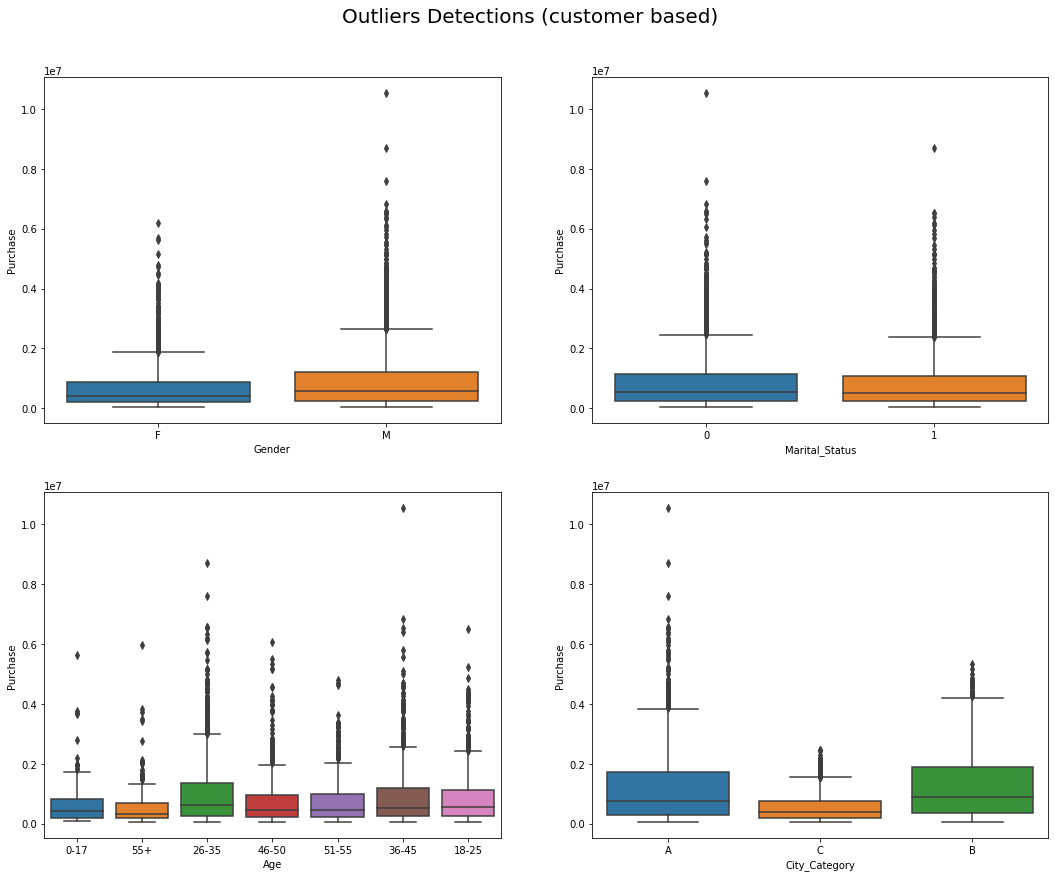

In [ ]:
plt.figure(figsize=[18,14])

df2 = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum().reset_index()
plt.subplot(2,2,1)
sns.boxplot(y=df2['Purchase'], x=df2['Gender'])

df2 = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum().reset_index()
plt.subplot(2,2,2)
sns.boxplot(y=df2['Purchase'], x=df2['Marital_Status'])

df2 = df.groupby(['User_ID', 'Age'])[['Purchase']].sum().reset_index()
plt.subplot(2,2,3)
sns.boxplot(y=df2['Purchase'], x=df2['Age'])

df2 = df.groupby(['User_ID', 'City_Category'])[['Purchase']].sum().reset_index()
plt.subplot(2,2,4)
sns.boxplot(y=df2['Purchase'], x=df2['City_Category'])

plt.suptitle('Outliers Detections (customer based)', y=.95, fontsize=20)
plt.show()

# There are more outliers in Male, few male customer purchased extreme amount of products.
# There are more outliers in Single Maritcal_Category, few single customer purchased extreme amount of products.

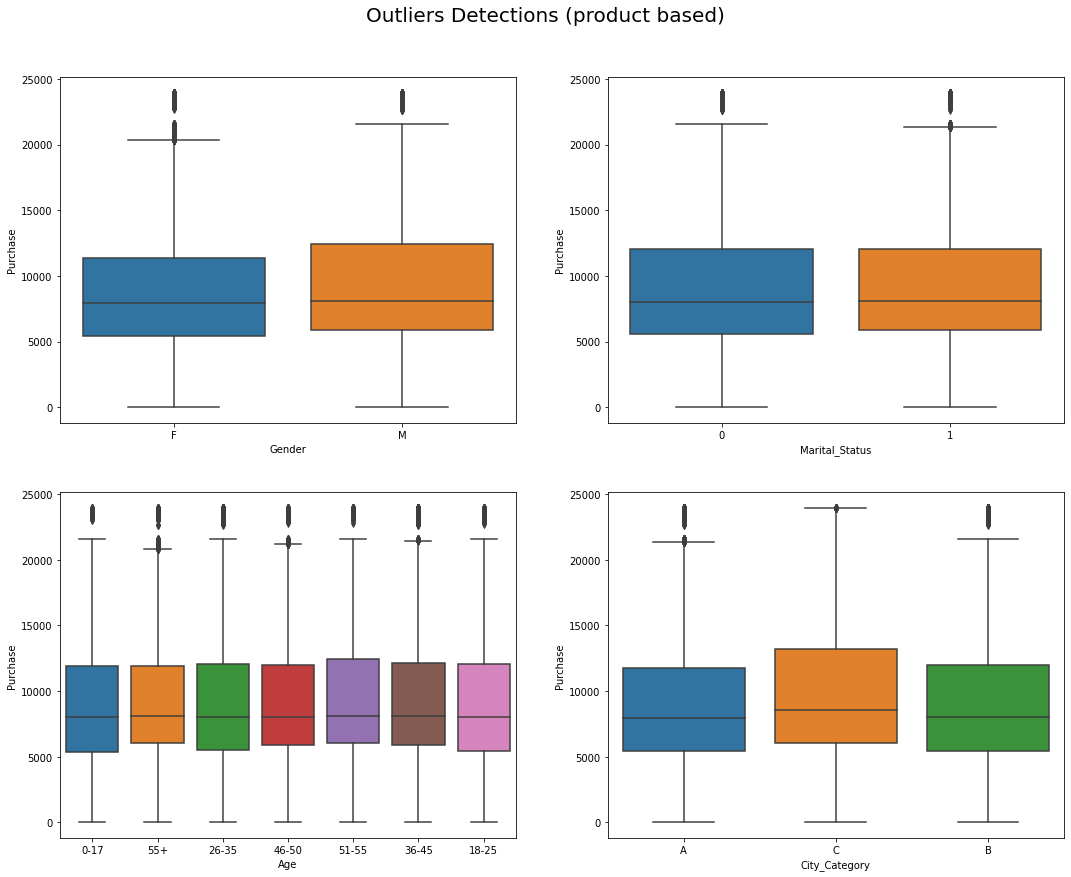

In [ ]:
plt.figure(figsize=[18,14])
plt.subplot(2,2,1)
sns.boxplot(y=df['Purchase'], x=df['Gender'])

plt.subplot(2,2,2)
sns.boxplot(y=df['Purchase'], x=df['Marital_Status'])

plt.subplot(2,2,3)
sns.boxplot(y=df['Purchase'], x=df['Age'])

plt.subplot(2,2,4)
sns.boxplot(y=df['Purchase'], x=df['City_Category'])

plt.suptitle('Outliers Detections (product based)', y=.95, fontsize=20)
plt.show()

# Male customer purchase some more expansive products.
# Customers from City_Category ('C') purchase some more expansive products.

In [ ]:
def find_outliers_IQR(df):
  q1=df['Purchase'].quantile(0.25)
  q3=df['Purchase'].quantile(0.75)
  IQR=q3-q1
  outliers = df[df['Purchase']>(q3+1.5*IQR)]
  return outliers.sort_values('Purchase',ascending=False)


In [ ]:
find_outliers_IQR(df.groupby(['User_ID', 'Gender'])[['Purchase']].sum().reset_index())

# Below we can see the customers who purchased with extreme total amount of products.

,User_ID,Gender,Purchase
4166,1004277,M,10536909
1634,1001680,M,8699596
2831,1002909,M,7577756
1885,1001941,M,6817493
416,1000424,M,6573609
...,...,...,...
3956,1004058,M,2451245
5400,1005539,F,2450068
4079,1004186,M,2448401
3905,1004007,M,2447282


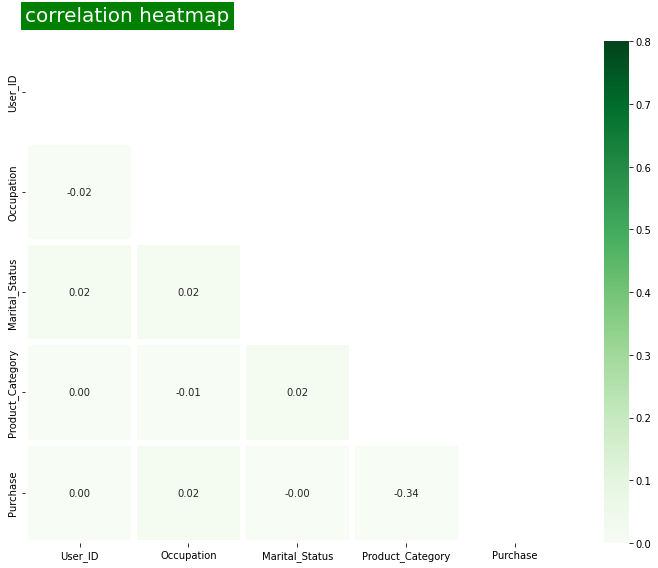

In [ ]:
plt.figure(figsize=[10,8])
dfc = pd.read_csv('/content/walmart_data.txt')
mask = np.triu(np.ones_like(dfc.corr()))
sns.heatmap(dfc.corr().round(2), cmap= "Greens", annot=True, mask=mask, fmt=".2f", linewidths=5, vmin=0, vmax=0.8)
plt.title('correlation heatmap', color='w',fontsize=20, fontweight = 'normal',backgroundcolor = 'g', pad = 20, loc='left')
plt.tight_layout()

# From the correlation plot, we can see the correlation is not significant between any pair of variables.

# CLT and CI Visual illustrations

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


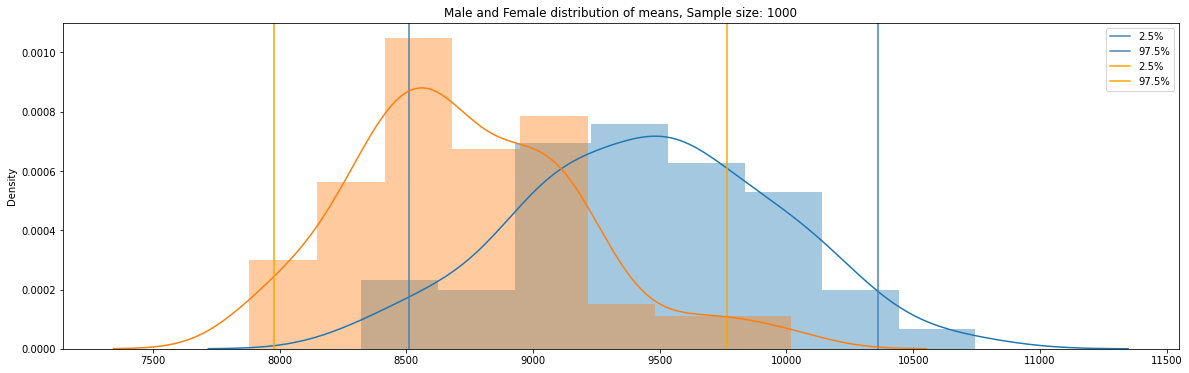

In [ ]:
avgamt_gender = df[['User_ID','Gender','Purchase']].copy()

avgamt_male = avgamt_gender[avgamt_gender['Gender']=='M'][['Purchase']]
avgamt_female = avgamt_gender[avgamt_gender['Gender']=='F'][['Purchase']]

sample_size = 100
num_repitions = 100

male_means = [avgamt_male.sample(sample_size).mean() for i in range (num_repitions)]
female_means = [avgamt_female.sample(sample_size).mean() for i in range (num_repitions)]

plt.figure(figsize = (20,6))

sns.distplot(male_means).set_title("Male and Female distribution of means, Sample size: 1000")
plt.axvline(np.percentile(male_means, 2.5), linestyle='-', color='steelblue',label="2.5%")
plt.axvline(np.percentile(male_means, 97.5), linestyle='-', color='steelblue',label="97.5%")

sns.distplot(female_means)
plt.axvline(np.percentile(female_means, 2.5), linestyle='-', color='orange',label="2.5%")
plt.axvline(np.percentile(female_means, 97.5), linestyle='-', color='orange',label="97.5%")

plt.legend()
plt.show()

With taking small size samples and less repeatations. Here we can see that the confidence interval overlap and distribution is not normally distributed. Thus, now we cannot conclude that man spend more money per transaction than women. We will increase the size of samples and repeatations to get overwhelming evidence.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


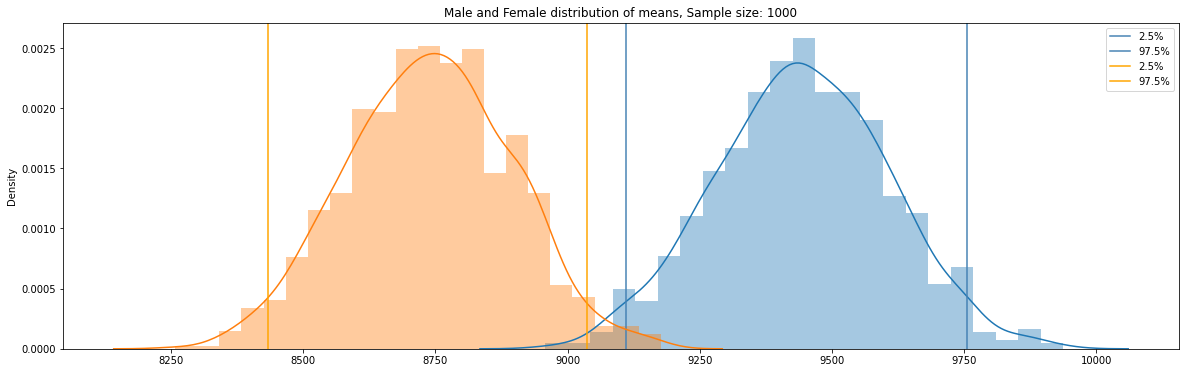

In [ ]:
avgamt_gender = df[['User_ID','Gender','Purchase']].copy()

avgamt_male = avgamt_gender[avgamt_gender['Gender']=='M'][['Purchase']]
avgamt_female = avgamt_gender[avgamt_gender['Gender']=='F'][['Purchase']]

sample_size = 1000
num_repitions = 1000

male_means = [avgamt_male.sample(sample_size).mean() for i in range (num_repitions)]
female_means = [avgamt_female.sample(sample_size).mean() for i in range (num_repitions)]

plt.figure(figsize = (20,6))

sns.distplot(male_means).set_title("Male and Female distribution of means, Sample size: 1000")
plt.axvline(np.percentile(male_means, 2.5), linestyle='-', color='steelblue',label="2.5%")
plt.axvline(np.percentile(male_means, 97.5), linestyle='-', color='steelblue',label="97.5%")

sns.distplot(female_means)
plt.axvline(np.percentile(female_means, 2.5), linestyle='-', color='orange',label="2.5%")
plt.axvline(np.percentile(female_means, 97.5), linestyle='-', color='orange',label="97.5%")

plt.legend()
plt.show()

confidence intervals of average male and female spending are not overlapping. By increasing the size of samples, narrow confidence intervals in relation to the point estimate tell us that the estimated value is relatively stable!

When the sample size increases, the standerd error decreases. Hence, as we increase the sample size, the difference between the sample mean and the population mean tends to decrease. In other words, larger sample sizes produce more precise estimates!

As number of repeatation increase, the sampling distributions more closely approximate the normal distribution and become more tightly clustered around the population mean even for skewed, nonnormal data!

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


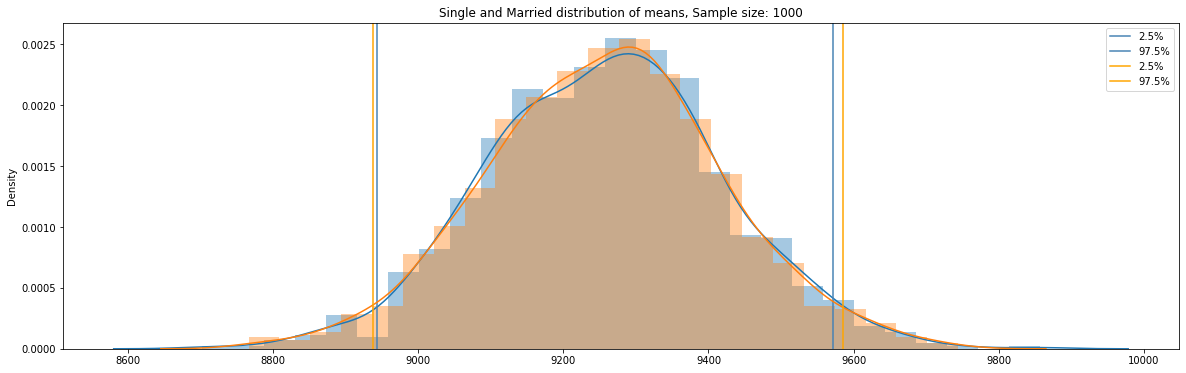

In [ ]:
avgamt_status = df[['User_ID','Marital_Status','Purchase']].copy()

avgamt_single = avgamt_status[avgamt_status['Marital_Status']==0][['Purchase']]
avgamt_married = avgamt_status[avgamt_status['Marital_Status']==1][['Purchase']]

sample_size = 1000
num_repitions = 1000

single_means = [avgamt_single.sample(sample_size).mean() for k in range (num_repitions)]
married_means = [avgamt_married.sample(sample_size).mean() for k in range (num_repitions)]

plt.figure(figsize = (20,6))

sns.distplot(single_means).set_title("Single and Married distribution of means, Sample size: 1000")
plt.axvline(np.percentile(single_means, 2.5), linestyle='-', color='steelblue',label="2.5%")
plt.axvline(np.percentile(single_means, 97.5), linestyle='-', color='steelblue',label="97.5%")

sns.distplot(married_means)
plt.axvline(np.percentile(married_means, 2.5), linestyle='-', color='orange',label="2.5%")
plt.axvline(np.percentile(married_means, 97.5), linestyle='-', color='orange',label="97.5%")

plt.legend()
plt.show()


It's observed that the avg spending on purchase in between married and single is same and overlap almost completely.

.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

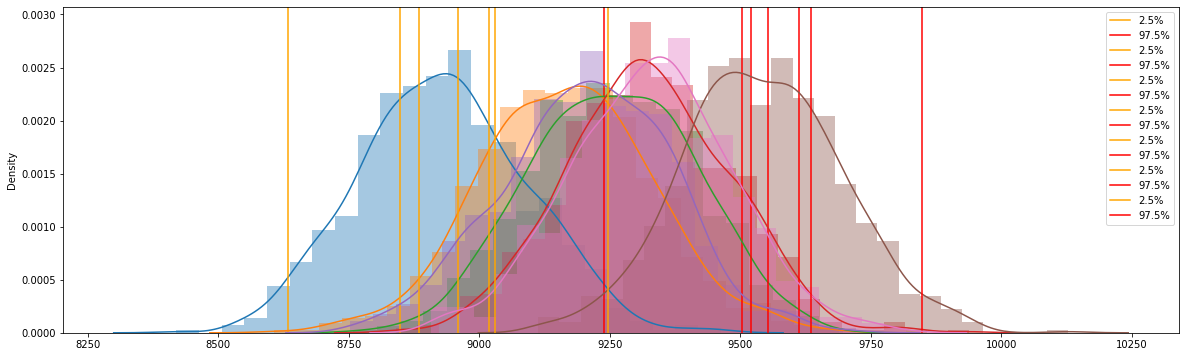

In [ ]:
plt.figure(figsize = (20,6))


avgamt_age = df[['User_ID','Age','Purchase']].copy()

for i in (sorted(list(avgamt_age['Age'].unique()))):
  avgamt_single = avgamt_age[avgamt_age['Age']==i][['Purchase']]

  sample_size = 1000
  num_repitions = 1000

  means = [avgamt_single.sample(sample_size).mean() for k in range (num_repitions)]

  sns.distplot(means)
  plt.axvline(np.percentile(means, 2.5), linestyle='-', color='orange',label="2.5%")
  plt.axvline(np.percentile(means, 97.5), linestyle='-', color='red',label="97.5%")
  plt.legend()
plt.show()

It's observed that the avg spending on purchase in among age groups is almost similer and overlaping eachother. There is not significant difference.

.

# Confidence intervals

In [ ]:
for i in (['Gender','Marital_Status']):
  cat = list(df[i].unique())
  for j in (cat):
    sample_size = 1000
    num_repitions = 1000
    pop = df[df[i]==j][['Purchase']]
    means = [pop.sample(sample_size).mean() for k in range (num_repitions)]

    def CI(p):
      sample_n = 1000
      std_dev = np.std(df['Purchase'][df[i]==j])
      margin_error = norm.ppf((p+(100-p)/2)*0.01)*std_dev/np.sqrt(sample_n)
      Lower_Limit = round(np.mean(means)-margin_error)
      Upper_Limit = round(np.mean(means)+margin_error)
      print(f"{p}% CI for {i} {j}: [{Lower_Limit},{Upper_Limit}]")
    CI(90)
    CI(95)
    CI(99)
    print()

90% CI for Gender F: [8495,8991]
95% CI for Gender F: [8448,9039]
99% CI for Gender F: [8355,9131]

90% CI for Gender M: [9169,9698]
95% CI for Gender M: [9118,9749]
99% CI for Gender M: [9019,9848]

90% CI for Marital_Status 0: [9007,9530]
95% CI for Marital_Status 0: [8957,9580]
99% CI for Marital_Status 0: [8859,9678]

90% CI for Marital_Status 1: [8995,9517]
95% CI for Marital_Status 1: [8945,9567]
99% CI for Marital_Status 1: [8847,9665]



In [ ]:
for i in (['Age']):
  cat = sorted(list(df[i].unique()))
  for j in (cat):
    sample_size = 1000
    num_repitions = 1000
    pop = df[df[i]==j][['Purchase']]
    means = [pop.sample(sample_size).mean() for k in range (num_repitions)]

    def CI(p):
      sample_n = 1000
      std_dev = np.std(df['Purchase'][df[i]==j])
      margin_error = norm.ppf((p+(100-p)/2)*0.01)*std_dev/np.sqrt(sample_n)
      Lower_Limit = round(np.mean(means)-margin_error)
      Upper_Limit = round(np.mean(means)+margin_error)
      print(f"{p}% CI for {i} {j}: [{Lower_Limit},{Upper_Limit}]")
    CI(90)
    CI(95)
    CI(99)
    print()

90% CI for Age 0-17: [8673,9204]
95% CI for Age 0-17: [8622,9255]
99% CI for Age 0-17: [8522,9355]

90% CI for Age 18-25: [8907,9430]
95% CI for Age 18-25: [8856,9481]
99% CI for Age 18-25: [8758,9579]

90% CI for Age 26-35: [8992,9513]
95% CI for Age 26-35: [8942,9563]
99% CI for Age 26-35: [8844,9660]

90% CI for Age 36-45: [9064,9586]
95% CI for Age 36-45: [9014,9636]
99% CI for Age 36-45: [8916,9734]

90% CI for Age 46-50: [8961,9478]
95% CI for Age 46-50: [8911,9527]
99% CI for Age 46-50: [8815,9624]

90% CI for Age 51-55: [9269,9798]
95% CI for Age 51-55: [9219,9849]
99% CI for Age 51-55: [9119,9948]

90% CI for Age 55+: [9074,9595]
95% CI for Age 55+: [9024,9645]
99% CI for Age 55+: [8927,9743]



The larger confidence levels lead to wider confidence intervals but lower percision.

With a 95 percent confidence interval, we have a 5 percent possibility of being wrong. With a 99 percent confidence interval will be wider than a 95 percent confidence interval and precision has to be lower. That's the intuitive way to understand it. We have seen it mathematically by using the confidence interval formula as well as Visual Analysis.

#Questions and Answers:

(1) Are women spending more money per transaction than men? Why or Why not?

Ans: No. Sampling mean of per transaction from male customer and female customers are different. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women.
The reason for less purchase by women could have several factors:
  Walmart store might have less products or less categories for females.
  Males might be doing the purchase for females.
  Salary can be a factor in less purchase for females.


(2) Confidence intervals and distribution of the mean of the expenses by female and male customers.

At 95% Confidence Interval with sample size 1000

Average amount spend by male customers lie in the range: [8448,9039]

Average amount spend by female customers lie in the range: [9118,9749]


(3) Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

(4) Results when the same activity is performed for Married vs Unmarried

At 95% Confidence Interval with sample size 1000

Average amount spend by single customers lie in the range: [8957,9580]

Average amount spend by married customers lie in the range: [8945,9567]

It's observed that the avg spending on purchase in between married and single is same and overlap almost completely.

Walmart can focus these two groups as a single cohort to target them as a single group in order to increase the sale.

But when it comes to specific category of items, Single male customer purchase more products and Married female customers purchase less porduct. Walmart can increase items in store that are made specially for married female customers or give discounts to attract those customers in store.

(5) Results when the same activity is performed for Age


with sample size 1000

95% CI for Age 0-17: [8622,9255]

95% CI for Age 18-25: [8856,9481]

95% CI for Age 26-35: [8942,9563]

95% CI for Age 36-45: [9014,9636]

95% CI for Age 46-50: [8911,9527]

95% CI for Age 51-55: [9219,9849]

95% CI for Age 55+: [9024,9645]

It's observed that the avg spending on purchase in among age groups is almost similer and CI values overlaping. So we can say thet There is not significant difference in avg purchase among age groups. All the upper limits are greater than lower limits of different Age groups, that means overlapping.



#Note -

* I would like to inform that, All the non visulal anlysis results are statistics of given data (550068 customers), that results are not 100% true for 50 million customers.

* All the appropriate basic insights I have mentioned with relevent code, and calculations based on results.

* There is no significant relationship between variables.

* Comments for univariate and bivariate plots I have mentioned with relevent plots.

* I have  illustrated the insights of CLT while exploration.

* We could consider the whole data set of 550068 rows as one sample, and we could do resampling bootstraping of 550068 sample size to predict  statistics for 50 million customers population.

* In all analysis I have considerd given data of 550068 rows as populatoion then I have taken many samples of size = 1000 from given dataset.






# Insights and Recommendations

1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers. we can say like women spend less on Black Friday than men. compnay should also take initiatives to attract female customers, company can increase producs in store that made for women, like makeup items, household items, kitchen utensils, accessories .

2. Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.

3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.

5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.

6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

7. Product category 9, 17 have very less purchase. Company can think of dropping it.

8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.

9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.

